哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [1]:
import pandas as pd 
import numpy as np

In [2]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
df_AA=pd.read_csv("A_lvr_land_A.csv",parse_dates=["交易年月日"])
df_BA=pd.read_csv("B_lvr_land_A.csv",parse_dates=["交易年月日"])
df_EA=pd.read_csv("E_lvr_land_A.csv",parse_dates=["交易年月日"])
df_FA=pd.read_csv("F_lvr_land_A.csv",parse_dates=["交易年月日"])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
df_AA.drop(index=0 , inplace=True)
df_BA.drop(index=0 , inplace=True)
df_EA.drop(index=0 , inplace=True)
df_FA.drop(index=0 , inplace=True)

In [4]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
df_AA["city"]=pd.Series(["Taipei"]*df_AA.shape[0])
df_BA["city"]=pd.Series(["New_Taipei"]*df_BA.shape[0])
df_EA["city"]=pd.Series(["Taichung"]*df_EA.shape[0])
df_FA["city"]=pd.Series(["Kaohsiung"]*df_FA.shape[0])



In [5]:
#4. 將以上四份資料運用pd.concat()串接
df = pd.concat([df_AA,df_BA,df_EA,df_FA])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59476 entries, 1 to 19818
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   鄉鎮市區           59476 non-null  object 
 1   交易標的           59476 non-null  object 
 2   土地區段位置建物區段門牌   59476 non-null  object 
 3   土地移轉總面積平方公尺    59476 non-null  object 
 4   都市土地使用分區       54097 non-null  object 
 5   非都市土地使用分區      4306 non-null   object 
 6   非都市土地使用編定      4302 non-null   object 
 7   交易年月日          59476 non-null  object 
 8   交易筆棟數          59476 non-null  object 
 9   移轉層次           49724 non-null  object 
 10  總樓層數           49664 non-null  object 
 11  建物型態           59476 non-null  object 
 12  主要用途           47889 non-null  object 
 13  主要建材           49680 non-null  object 
 14  建築完成年月         48690 non-null  object 
 15  建物移轉總面積平方公尺    59476 non-null  object 
 16  建物現況格局-房       59476 non-null  object 
 17  建物現況格局-廳       59476 non-null  object 
 18  建物現況格局

# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [6]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
# columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
#                                       'main_building_area': 'float',
#                                       'room_number': 'int','hall_number': 'int','health_number': 'int'}
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                       'main_building_area': 'float'
                                       }


In [7]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
df.rename(columns=columns_mapping,inplace=True)

In [8]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
dfa=df[df["main_use"]=="住家用"]
df_live= dfa[dfa["use_zoning"]=="住"][analysis_columns]

In [9]:
df_live.dropna(inplace=True)

In [10]:
df_live.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 1 to 11512
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   object 
 5   building_area_square_meter  7802 non-null   object 
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   object 
 9   room_number                 7802 non-null   object 
 10  hall_number                 7802 non-null   object 
 11  health_number               7802 non-null   object 
dtypes: float64(1), object(11)
memory usage: 792.4+ KB


In [11]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
df_live=df_live.astype(columns_type)
df_live.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 1 to 11512
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   int64  
 5   building_area_square_meter  7802 non-null   float64
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   float64
 9   room_number                 7802 non-null   object 
 10  hall_number                 7802 non-null   object 
 11  health_number               7802 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 792.4+ KB


In [12]:
df_live.reset_index(drop=True,inplace=True)

In [13]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引

df_live["tx_dt_year"]=[ i[:3] for i in df_live["tx_dt"]]

In [14]:
def number(x):
    if int(x.room_number)>=1 and int(x.room_number)<=5:
        if int(x.hall_number) >=1 and int(x.hall_number)<=2:
            return True
        else:
            return False
    else:
        return False
df_live["number"] = df_live[["room_number","hall_number"]].apply(number,axis=1)

In [15]:
df_live=df_live[df_live["number"].tolist()].reset_index(drop=True)

In [16]:
df_live.drop(columns="number",inplace=True)

In [17]:
df_live["room_number"].value_counts()

3    3674
2    1422
4    1058
1     587
5     248
Name: room_number, dtype: int64

# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [18]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

df_live["building_area_square_feet"] = df_live["building_area_square_meter"].map(lambda x : x*0.3025)
df_live["main_building_area_square_feet"]=df_live["main_building_area"].map(lambda x : x*0.3025)
df_live["unit_price_square_feet"]=df_live["unit_price"].map(lambda x : x/0.3025)

In [19]:
df_live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6989 entries, 0 to 6988
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   city                            6989 non-null   object 
 1   towns                           6989 non-null   object 
 2   main_use                        6989 non-null   object 
 3   use_zoning                      6989 non-null   object 
 4   total_price                     6989 non-null   int64  
 5   building_area_square_meter      6989 non-null   float64
 6   main_building_area              6989 non-null   float64
 7   tx_dt                           6989 non-null   object 
 8   unit_price                      6989 non-null   float64
 9   room_number                     6989 non-null   object 
 10  hall_number                     6989 non-null   object 
 11  health_number                   6989 non-null   object 
 12  tx_dt_year                      69

In [20]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
df_live.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.989000e+03,6989.000000,6989.000000,6989.000000,6989.000000,6989.000000,6.989000e+03
mean,1.167462e+07,122.446452,82.432052,95309.189154,37.040052,24.935696,3.150717e+05
std,1.260670e+07,64.345152,37.905940,59646.064258,19.464409,11.466547,1.971771e+05
min,0.000000e+00,0.970000,0.000000,0.000000,0.293425,0.000000,0.000000e+00
25%,5.600000e+06,82.960000,60.720000,53625.000000,25.095400,18.367800,1.772727e+05
50%,8.600000e+06,109.420000,79.020000,79957.000000,33.099550,23.903550,2.643207e+05
75%,1.344000e+07,148.000000,96.010000,119485.000000,44.770000,29.043025,3.949917e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,437.097375,101.567400,2.016873e+06


In [21]:
col = ["total_price","main_building_area","unit_price","main_building_area_square_feet","unit_price_square_feet"]
index =[]
for i in col:
    a=df_live[df_live[i]==0].index
    index.extend(a)

indexok = sorted(list(set(index)))

In [22]:
df_live.drop(index=indexok , inplace=True)  
df_live.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.949000e+03,6949.000000,6949.000000,6949.000000,6949.000000,6949.000000,6.949000e+03
mean,1.170544e+07,122.506224,82.906549,95495.895381,37.058133,25.079231,3.156889e+05
std,1.263178e+07,64.331091,37.493836,59706.032712,19.460155,11.341885,1.973753e+05
min,4.100000e+05,7.440000,7.440000,3239.000000,2.250600,2.250600,1.070744e+04
25%,5.600000e+06,83.010000,61.060000,53697.000000,25.110525,18.470650,1.775107e+05
50%,8.600000e+06,109.430000,79.180000,80192.000000,33.102575,23.951950,2.650975e+05
75%,1.350000e+07,147.990000,96.150000,119720.000000,44.766975,29.085375,3.957686e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,437.097375,101.567400,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [23]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
df_Taipei=df_live[df_live["city"]=="Taipei"]

In [24]:
num_features = []
for dtype, feature in zip(df_Taipei.dtypes, df_Taipei.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

7 Numeric Features : ['total_price', 'building_area_square_meter', 'main_building_area', 'unit_price', 'building_area_square_feet', 'main_building_area_square_feet', 'unit_price_square_feet']



In [25]:
cat_features = []
for dtype, feature in zip(df_Taipei.dtypes, df_Taipei.columns):
    if dtype == 'object':
        cat_features.append(feature)
print(f'{len(cat_features)} category Features : {cat_features}\n')

9 category Features : ['city', 'towns', 'main_use', 'use_zoning', 'tx_dt', 'room_number', 'hall_number', 'health_number', 'tx_dt_year']



In [26]:
#total_price為連續
from scipy import stats
"""連續VS連續"""
corr = [ stats.pearsonr(df_Taipei[i], df_Taipei['total_price'])[0]for i in num_features[1:] ]
def corr_sound(x):
    if x < 0.1:
        qual ="Negligible"
    elif x <=0.39:
        qual = 'Small'
    elif x <=0.69:
        qual = 'Medium'
    elif x <=0.99:
        qual = 'Large'
    else:
        qual = 'ALL'
        
    return qual
result_corr = []
for i in corr:
    print(i)
    a = corr_sound(i)
    result_corr.append(a)

0.883683322219134
0.7338655562060756
0.618695082280104
0.8836833222191339
0.7338655562060755
0.6186950822801041


In [27]:
"""連續ＶＳ離散"""
import pingouin as pg
#計算三種變異數
result_Eta2=[]
Eta2=[]
for i in cat_features:
    aov=pg.anova(dv="total_price", between=i, data=df_Taipei, detailed=True)
    etaSq=aov.SS[0] / (aov.SS[0] + aov.SS[1])
    Eta2.append(etaSq)
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
        
    result_Eta2.append(qual)
    
result_Eta2

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pingouin/parametric.py:990: RuntimeWarning: invalid value encountered in double_scalars
  msbetween = ssbetween / ddof1
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pingouin/parametric.py:990: RuntimeWarning: invalid value encountered in double_scalars
  msbetween = ssbetween / ddof1
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pingouin/parametric.py:990: RuntimeWarning: invalid value encountered in double_scalars
  msbetween = ssbetween / ddof1


['Negligible',
 'Medium',
 'Negligible',
 'Negligible',
 'Large',
 'Medium',
 'Medium',
 'Large',
 'Large']

In [28]:
pd.DataFrame({"column":num_features[1:]+cat_features,
              "category_Feature":["continuous"]*len(num_features[1:])+["discrete"]*len(cat_features),
              "level":result_corr+result_Eta2,
              "score":corr+Eta2})

,column,category_Feature,level,score
0,building_area_square_meter,continuous,Large,0.883683
1,main_building_area,continuous,Large,0.733866
2,unit_price,continuous,Medium,0.618695
3,building_area_square_feet,continuous,Large,0.883683
4,main_building_area_square_feet,continuous,Large,0.733866
5,unit_price_square_feet,continuous,Medium,0.618695
6,city,discrete,Negligible,0.000000
7,towns,discrete,Medium,0.081472
8,main_use,discrete,Negligible,0.000000
9,use_zoning,discrete,Negligible,0.000000


In [29]:
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
"""連續VS連續"""
corr_2 = [ stats.pearsonr(df_Taipei[i], df_Taipei['unit_price_square_feet'])[0]for i in num_features[:6] ]
def corr_sound(x):
    if x < 0.1:
        qual ="Negligible"
    elif x <=0.39:
        qual = 'Small'
    elif x <=0.69:
        qual = 'Medium'
    elif x <=0.99:
        qual = 'Large'
    else:
        qual = 'ALL'
        
    return qual
result_corr_2 = []
for i in corr_2:
    
    print(i)
    a = corr_sound(i)
    result_corr_2.append(a)

0.6186950822801041
0.2919248524975717
0.17344116378248728
0.9999999999999996
0.2919248524975717
0.17344116378248728


In [30]:
result_Eta2_2=[]
Eta2_2=[]
for i in cat_features:
    aov=pg.anova(dv="unit_price_square_feet", between=i, data=df_Taipei, detailed=True)
    etaSq=aov.SS[0] / (aov.SS[0] + aov.SS[1])
    Eta2_2.append(etaSq)
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
        
    result_Eta2_2.append(qual)
    
result_Eta2_2

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pingouin/parametric.py:990: RuntimeWarning: invalid value encountered in double_scalars
  msbetween = ssbetween / ddof1
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pingouin/parametric.py:990: RuntimeWarning: invalid value encountered in double_scalars
  msbetween = ssbetween / ddof1
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pingouin/parametric.py:990: RuntimeWarning: invalid value encountered in double_scalars
  msbetween = ssbetween / ddof1


['Negligible',
 'Large',
 'Negligible',
 'Negligible',
 'Large',
 'Small',
 'Negligible',
 'Medium',
 'Medium']

In [31]:
pd.DataFrame({"column":num_features[:6]+cat_features,
              "category_Feature":["continuous"]*len(num_features[:6])+["discrete"]*len(cat_features)
             ,"level":result_corr_2+result_Eta2_2
             ,"score":corr_2+Eta2_2})

,column,category_Feature,level,score
0,total_price,continuous,Medium,0.618695
1,building_area_square_meter,continuous,Small,0.291925
2,main_building_area,continuous,Small,0.173441
3,unit_price,continuous,ALL,1.000000
4,building_area_square_feet,continuous,Small,0.291925
5,main_building_area_square_feet,continuous,Small,0.173441
6,city,discrete,Negligible,0.000000
7,towns,discrete,Large,0.244842
8,main_use,discrete,Negligible,0.000000
9,use_zoning,discrete,Negligible,0.000000


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

In [34]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
import seaborn as sns
import matplotlib.pyplot  as plt

<AxesSubplot:xlabel='city', ylabel='unit_price_square_feet'>

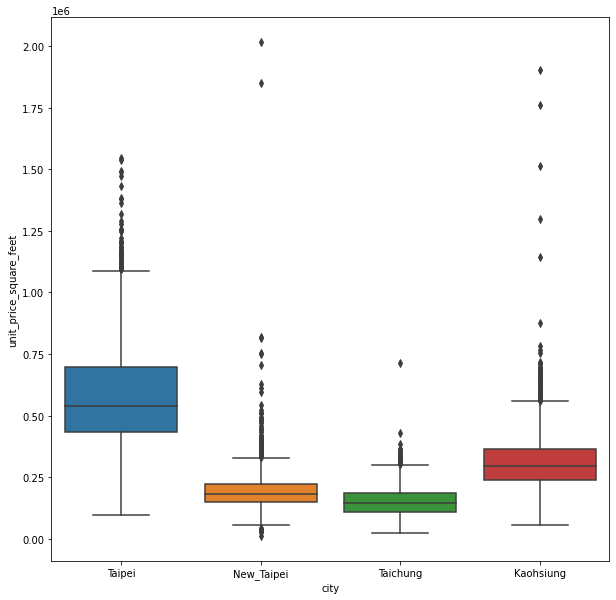

In [37]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="city",y="unit_price_square_feet",data=df_live)
""""最高的是Taipei""

<AxesSubplot:xlabel='room_number', ylabel='total_price'>

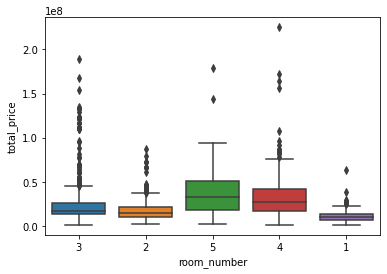

In [40]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
sns.boxplot(x="room_number",y="total_price",data=df_Taipei)


In [44]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_Taipei["towns"]=le.fit_transform(df_Taipei["towns"])

<AxesSubplot:xlabel='towns', ylabel='unit_price_square_feet'>

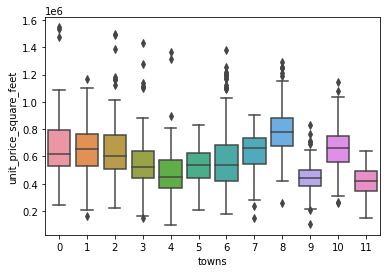

In [48]:
sns.boxplot(x="towns",y="unit_price_square_feet",data=df_Taipei)

In [65]:
towns_unit_price_square_feet=df_Taipei.groupby("towns").agg({"unit_price_square_feet":np.median}).sort_values(by="unit_price_square_feet",ascending=False)




In [64]:
le.inverse_transform(towns_unit_price_square_feet.reset_index()["towns"].values)

array(['大安區', '大同區', '松山區', '中正區', '中山區', '信義區', '士林區', '南港區', '內湖區',
       '北投區', '文山區', '萬華區'], dtype=object)